# Psychoinformatics - Week 14 (Exercises)
李采蓉 b08207042@ntu.edu.tw

## 1 進一步研究CNN (6 points)

### 1.1 為何ResNet50會判斷小女孩照片為ping-pong_bal, bubble, or Band_Aid? (4 points)

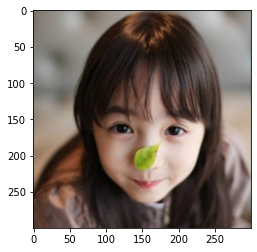

In [25]:
import urllib.request
import cv2
import matplotlib.pyplot as plt

urllib.request.urlretrieve('http://www.gx8899.com/uploads/allimg/171025/3-1G025101H3-50.jpg','girl.jpg')
img_org=cv2.imread('girl.jpg')
img_Br = cv2.cvtColor(img_org,cv2.COLOR_BGR2RGB)
plt.imshow(img_Br)

In [112]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np 

model = ResNet50(weights='imagenet')

x = cv2.resize(img_Br, (224, 224))
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

49152/35363 [=========================================] - 0s 0us/step
Predicted: [('n03942813', 'ping-pong_ball', 0.20599267), ('n09229709', 'bubble', 0.16151443), ('n02786058', 'Band_Aid', 0.10826775)]


#### 顏色影響

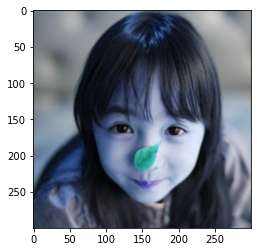

In [ ]:
plt.imshow(img_org)

In [ ]:
# 看看沒調色過的(藍爆了)
x = cv2.resize(img_org, (224, 224))
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n09229709', 'bubble', 0.1094842), ('n04370456', 'sweatshirt', 0.068891875), ('n03944341', 'pinwheel', 0.05752671)]


#### 裁剪影響(左眼)

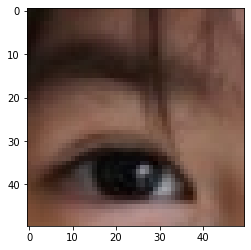

In [ ]:
img_Leye = img_Br[125:175, 100:150]
plt.imshow(img_Leye)

In [ ]:
x = cv2.resize(img_Leye, (224, 224))
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n03929660', 'pick', 0.08283008), ('n03314780', 'face_powder', 0.068767115), ('n03825788', 'nipple', 0.06535555)]


#### 裁剪影響(右眼)

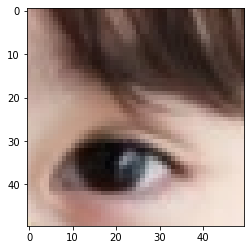

In [ ]:
img_Reye = img_Br[130:180, 175:225]
plt.imshow(img_Reye)

In [ ]:
x = cv2.resize(img_Reye, (224, 224))
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])
# 我真的不知道為什麼眼睛會被辨認成奶頭QAQ

Predicted: [('n03314780', 'face_powder', 0.29433635), ('n03676483', 'lipstick', 0.26481116), ('n03825788', 'nipple', 0.055117298)]


#### 裁剪影響(葉子)

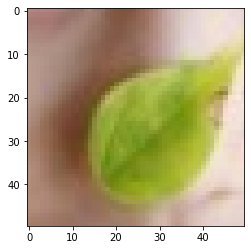

In [ ]:
img_leaf = img_Br[175:225, 125:175]
plt.imshow(img_leaf)

In [ ]:
x = cv2.resize(img_leaf, (224, 224))
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])
# vine_snake=長鼻樹蛇(一種青蘋綠色小蛇)

Predicted: [('n07753113', 'fig', 0.3047867), ('n07745940', 'strawberry', 0.08458457), ('n01739381', 'vine_snake', 0.07505586)]


Please write your discussion here<br>
https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a<br>
imagenet的資料庫裡並無「人臉(face)」、「女孩(girl)」、「人類(human)」這類選項；從以上分析可以大致猜到，顏色、對比度、形狀都是蠻重要的特徵項目。<br>
+ ping-pong_bal: 在藍色狀態下並沒有被判斷為ping-pong ball。推測因為女孩臉圓圓且臉為膚色(暖色)，跟ping-pong ball接近。
+ bubble: 藍色狀態下也有被判定為bubble，但擷取雙眼偵測則沒有。故推測是女孩臉圓圓且髮絲有光澤，所以才被判斷為bubble。
+ Band_Aid: 擷取葉子並沒有被判定為band-aid，藍色狀態的臉也沒有。推測「臉為膚色」為主要原因。

### 1.2 請展示有別人pre-trained好的Keras model可以成功辨認girl.jpg為人臉 (4 points)

In [1]:
!pip install mtcnn
from mtcnn.mtcnn import MTCNN

You should consider upgrading via the 'C:\Users\s9501\anaconda3\python.exe -m pip install --upgrade pip' command.


In [13]:
detector = MTCNN(steps_threshold=[0.0, 0.0, 0.0])
face = detector.detect_faces(img_Br)

face = max(faces, key=lambda x: x['confidence'])
face

{'box': [89, 81, 145, 191],
 'confidence': 0.9982607960700989,
 'keypoints': {'left_eye': (123, 159),
  'right_eye': (196, 164),
  'nose': (158, 207),
  'mouth_left': (127, 229),
  'mouth_right': (186, 232)}}

信心程度有0.998，蠻高的

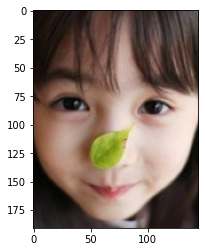

In [22]:
# 看一下抓哪個區域判斷
img_box = img_Br[81:81+191, 89:89+145]
plt.imshow(img_box)
# 好喔，蠻正常的，就是臉的部分

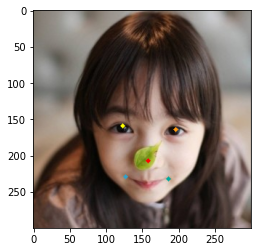

In [26]:
# 左眼(黃點)
cv2.circle(img_Br, (123, 159), 1,(255, 255, 0), 4)
# 右眼 (鎘黃，ㄜ就是有點橘橘的黃)
cv2.circle(img_Br, (196, 164), 1,(255, 153, 18), 4)
# 鼻子 (紅色)
cv2.circle(img_Br, (158, 207), 1,(255, 0, 0), 4)
# 嘴巴最左側 (孔雀藍，偏藍)
cv2.circle(img_Br, (127, 229), 1,(51, 161, 201), 4)
# 嘴巴最右側 (錳藍，偏綠)
cv2.circle(img_Br, (186, 232), 1,(3, 168, 158), 4)
plt.imshow(img_Br)

結論：抓得蠻準的

#### 同場加贈：小妹妹長得像誰?

In [166]:
#from keras.engine import Model
!pip install keras_vggface
!pip install keras_applications
!pip install git+https://github.com/rcmalli/keras-vggface.git
!pip install keras_applications --no-deps
filename = "/usr/local/lib/python3.7/dist-packages/keras_vggface/models.py"
text = open(filename).read()
open(filename, "w+").write(text.replace('keras.engine.topology', 'tensorflow.keras.utils'))
import tensorflow as tf
from keras.layers import Input
from keras.preprocessing import image
from keras_vggface.vggface import VGGFace
from keras_vggface import utils
import numpy as np

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-_r_f1v3x
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-_r_f1v3x


In [167]:
model = VGGFace()

In [170]:
img = image.load_img('girl.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = utils.preprocess_input(x, version=1) # or version=2
preds = model.predict(x)
print('Predicted:', utils.decode_predictions(preds))

360448/346184 [===============================] - 0s 0us/step
Predicted: [[["b'Hye-kyo_Song'", 0.26114744], ["b'Doona_Bae'", 0.047403596], ["b'Tatsuya_Fujiwara'", 0.036788464], ["b'Michelle_Krusiec'", 0.03225508], ["b'Crystal_Bernard'", 0.026461195]]]


Hye-kyo_Song(宋慧喬) 26%<br>
<table>
    <td>
        <img src="ko-1-1561956884.jpg" width="62%">
    </td>
    <td>
        <img src="girl.jpg" >
    </td>
</table>
從都是內雙、眼距、眉距來看是蠻像的啦ㄎㄎ